# Configurações de Experimentação

Este arquivo foi criado por Leonardo Monteiro Neres de Lima

## Descrição da atividade

Executar 100 repetições do algoritmo desenvolvido na Parte 1 para as seguintes configurações η × I = {0,4, 0,1, 0,01} × {(−100, + 100),(−1, + 1),(−0,5, + 0,5)}.


## Inportações

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import perceptron
# from random import seed
from random import random
import os

### Configurações a serem consideradas

In [7]:
# Teta
teta = 1

# taxa de aprendizado
n = [.4, .1, .01]

# modulo para gerar o intervalo a ser utilizado para a distribuição uniforme do valor dos pesos
intervalo = [100, 1, .5]

### Produto cartesiano para gerar uma lista de Configurações

In [8]:
index = pd.MultiIndex.from_product([n, intervalo], names = ["n", "intervalo"])

x = pd.DataFrame(index = index).reset_index()

### Funções para capturar e imprimir as configurações

In [9]:
# retorna uma lista com os parametros da configuração
def get_conf(n, i):
    return [n, -i, i]
    
# imprime a configuração
def print_conf(n, i_i, i_s):
    print('Taxa de aprendizado: '+ str(n)+'\nIntervalo a ser utilizado para a distribuição uniforme do valor dos pesos: ('+ str(i_i) +', '+ str(i_s) +')')

## Leitura e configuração do Dataset

In [10]:
# leitura do dataset
data = np.fromfile(os.path.join('datasets', 'data2.txt'), dtype=float)
print(data.shape)


# Função para configurar entrada e saída para o treinamento do perceptron
def get_entradas_e_saidas(data):
    i = 0
    entradas = []
    saidas = []
    while(i < len(data)):
        entradas.append([data[i], data[i+1]])
        saidas.append(data[i+2])
        i = i + 3
    return np.array(entradas), np.array(saidas)

entradas, saidas = get_entradas_e_saidas(data)

(1800,)


## Funções Auxiliares

 Para o cumprimento da atividade é necessário uma distribuição uniforme de valores aleatórios para inicialização dos pesos para a execução do treinamento, a exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta, e também a média e desvio padrão de quantidade ajustes e épocas das 100 execuções de treinamento de cada configuração de treinamento.

In [3]:
# geração de um número aleatório dentro de um intervalo
def random_interval(i, s):
    min = i
    max = s
    return min + (random() * (max - min))

# geração de uma lista de pesos segundo uma distribuição uniforme de valores aleatórios dado o intervalo
def get_pesos(i, s):
    # seed(1)
    return np.array([random_interval(i, s), random_interval(i, s)])


In [4]:
# execução de n execuções de treinamento e impressão da média e desvio padrão de quantidade ajustes e épocas
def executions_conf(interval_i, interval_s, n, n_executions, teta):
    v_pesos = []
    v_epocas = []
    v_ajustes = []
    for i in range(n_executions):
        print(i)
        init_pesos = get_pesos(interval_i, interval_s)
        pesos, epocas, ajustes = perceptron.treinamento(entradas, saidas, init_pesos, n, teta)
        v_pesos.append(pesos)
        v_epocas.append(epocas)
        v_ajustes.append(ajustes)
    pesos = np.array(v_pesos)
    epocas = np.array(v_epocas)
    ajustes = np.array(v_ajustes)
    print('-'*20+'Ajustes de Pesos'+20*'-')
    print('Media' + np.average(ajustes))



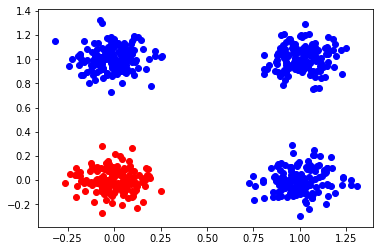

In [11]:
# exibição de um gráfico para ilustrar as classes do dataset e o aprendizado representado por uma reta
def gera_grafico(entradas, saidas):
    class_1_x = []
    class_1_y = []
    class_2_x = []
    class_2_y = []
    for i in range(len(entradas)):
        if (saidas[i]==1):
            class_1_x.append(entradas[i][0])
            class_1_y.append(entradas[i][1])
        else:
            class_2_x.append(entradas[i][0])
            class_2_y.append(entradas[i][1])

    plt.scatter(class_1_x, class_1_y, color='red')
    plt.scatter(class_2_x, class_2_y, color='blue')

gera_grafico(entradas, saidas)

## Função de iteração da lista de configurações 

A chamada da exibição de um gráfico e 100 execuções de treinamento de cada configuração.

In [12]:
# itera pela lista capturando e imprimindo o produto cartesiano de configuracoes
for i in range(len(x['n'])):
    print('\nConfiguração ' + str(i+1))
    y = get_conf(x['n'][i], x['n'][i])
    print_conf(y[0],y[1],y[2])
    executions_conf(y[1], y[2], y[0], 100, teta)


64 -0.70565486]
Pesos:  [-4.51754955 -0.65296874]
Pesos:  [-4.52034118 -0.66310105]
Pesos:  [-4.54712387 -0.68705044]
Pesos:  [-4.55554019 -0.7331622 ]
Pesos:  [-4.63497749 -0.75252477]
Pesos:  [-4.64871818 -0.78454644]
Pesos:  [-4.63220486 -0.76330557]
Pesos:  [-4.623293   -0.73981783]
Pesos:  [-4.59474507 -0.77039831]
Pesos:  [-4.64343219 -0.77537316]
Pesos:  [-4.58079507 -0.84959814]
Pesos:  [-4.55925334 -0.86304021]
Pesos:  [-4.56061588 -0.87135568]
Pesos:  [-4.64265703 -0.83209819]
Pesos:  [-4.68487668 -0.90627698]
Pesos:  [-4.63789316 -0.91671901]
Pesos:  [-4.68527291 -0.86983892]
Pesos:  [-4.70949633 -0.878276  ]
Pesos:  [-4.78261164 -0.86569624]
Pesos:  [-4.77284838 -0.83470668]
Pesos:  [-4.72928642 -0.82434163]
Pesos:  [-4.75505536 -0.84993171]
Pesos:  [-4.7551906  -0.83836235]
Pesos:  [-4.76606167 -0.85051646]
Pesos:  [-4.75544919 -0.87848436]
Pesos:  [-4.76058311 -0.95330392]
Pesos:  [-4.8096945  -0.89843462]
Pesos:  [-4.80357964 -0.91037635]
Pesos:  [-4.81799361 -0.9101406 

KeyboardInterrupt: 